In [3]:

import pandas as pd

df = pd.read_csv("/Users/sankalpajoshi/Documents/Data Science Project Files/AWS_Pareto/SaaS-Sales.csv")



In [4]:
import pandas as pd

df = pd.read_csv("/Users/sankalpajoshi/Documents/Data Science Project Files/AWS_Pareto/SaaS-Sales.csv")
print(df.columns.tolist())
df.head()


['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit']


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [5]:
df = df.dropna(subset=["Customer ID", "Sales"])
df["Sales"] = df["Sales"].astype(float)
df = df.rename(columns={"Customer ID": "Customer_ID", "Sales": "Revenue"})


In [6]:
revenue_per_customer = df.groupby("Customer_ID", as_index=False)["Revenue"].sum()
revenue_per_customer = revenue_per_customer.sort_values("Revenue", ascending=False)


In [8]:
import numpy as np

revenue_per_customer["Cum_Customer_Pct"] = (np.arange(1, len(revenue_per_customer) + 1) / len(revenue_per_customer)) * 100


In [10]:
import numpy as np

revenue_per_customer["Cum_Revenue_Pct"] = (
    revenue_per_customer["Revenue"].cumsum() 
    / revenue_per_customer["Revenue"].sum() * 100
)

revenue_per_customer["Cum_Customer_Pct"] = (
    np.arange(1, len(revenue_per_customer) + 1) 
    / len(revenue_per_customer) * 100
)


In [11]:
revenue_per_customer.head()


,Customer_ID,Revenue,Cum_Revenue_Pct,Cum_Customer_Pct
28,1029,55719.2100,2.425526,1.010101
8,1009,43893.0424,4.336245,2.020202
77,1080,42904.1670,6.203916,3.030303
10,1011,41255.9471,7.999839,4.040404
90,1093,41220.4188,9.794215,5.050505


In [13]:
pareto_cutoff = revenue_per_customer[revenue_per_customer["Cum_Revenue_Pct"] <= 80]
top20pct_customers = len(pareto_cutoff) / len(revenue_per_customer) * 100
print(f"Top {top20pct_customers:.2f}% customers generate 80% of revenue.")


Top 63.64% customers generate 80% of revenue.


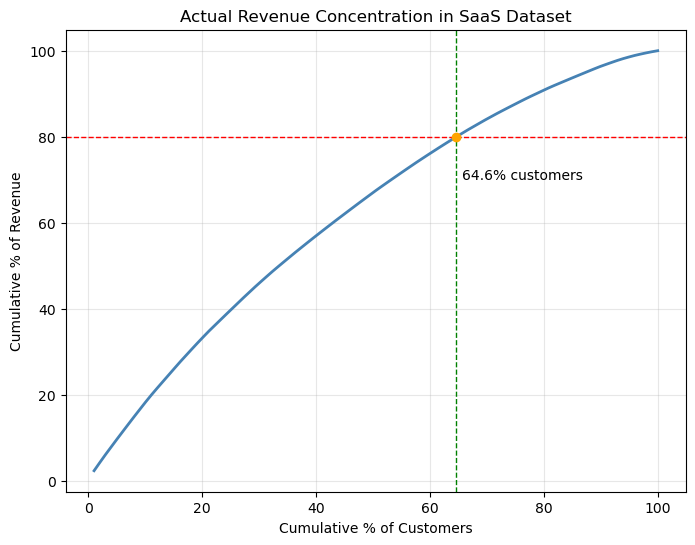

In [16]:
pareto_point = revenue_per_customer[revenue_per_customer["Cum_Revenue_Pct"] >= 80].iloc[0]
x_value = pareto_point["Cum_Customer_Pct"]
y_value = pareto_point["Cum_Revenue_Pct"]

plt.figure(figsize=(8,6))
plt.plot(revenue_per_customer["Cum_Customer_Pct"], revenue_per_customer["Cum_Revenue_Pct"], linewidth=2, color="steelblue")
plt.axhline(80, color="red", linestyle="--", linewidth=1)
plt.axvline(x_value, color="green", linestyle="--", linewidth=1)
plt.scatter(x_value, y_value, color="orange", zorder=5)
plt.text(x_value+1, y_value-10, f"{x_value:.1f}% customers", color="black", fontsize=10)
plt.title("Actual Revenue Concentration in SaaS Dataset")
plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative % of Revenue")
plt.grid(alpha=0.3)
plt.show()


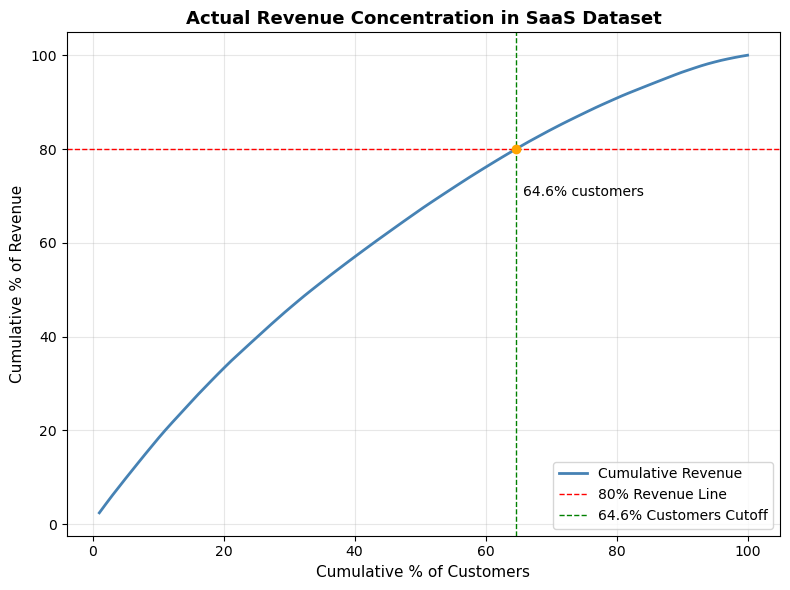

Top 64.6% customers generate 80% of total revenue.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/sankalpajoshi/Documents/Data Science Project Files/AWS_Pareto/SaaS-Sales.csv")

# Clean + rename
df = df.dropna(subset=["Customer ID", "Sales"])
df["Sales"] = df["Sales"].astype(float)
df = df.rename(columns={"Customer ID": "Customer_ID", "Sales": "Revenue"})

# Aggregate revenue per customer
revenue_per_customer = df.groupby("Customer_ID", as_index=False)["Revenue"].sum()
revenue_per_customer = revenue_per_customer.sort_values("Revenue", ascending=False)

# Compute cumulative percentages
revenue_per_customer["Cum_Revenue_Pct"] = (
    revenue_per_customer["Revenue"].cumsum() / revenue_per_customer["Revenue"].sum() * 100
)
revenue_per_customer["Cum_Customer_Pct"] = (
    np.arange(1, len(revenue_per_customer) + 1) / len(revenue_per_customer) * 100
)

# Identify actual 80% cutoff
pareto_point = revenue_per_customer[revenue_per_customer["Cum_Revenue_Pct"] >= 80].iloc[0]
x_value = pareto_point["Cum_Customer_Pct"]
y_value = pareto_point["Cum_Revenue_Pct"]

# Plot
plt.figure(figsize=(8,6))
plt.plot(revenue_per_customer["Cum_Customer_Pct"],
         revenue_per_customer["Cum_Revenue_Pct"],
         linewidth=2, color="steelblue", label="Cumulative Revenue")
plt.axhline(80, color="red", linestyle="--", linewidth=1, label="80% Revenue Line")
plt.axvline(x_value, color="green", linestyle="--", linewidth=1, label=f"{x_value:.1f}% Customers Cutoff")
plt.scatter(x_value, y_value, color="orange", zorder=5)
plt.text(x_value+1, y_value-10, f"{x_value:.1f}% customers", color="black", fontsize=10)
plt.title("Actual Revenue Concentration in SaaS Dataset", fontsize=13, weight="bold")
plt.xlabel("Cumulative % of Customers", fontsize=11)
plt.ylabel("Cumulative % of Revenue", fontsize=11)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Top {x_value:.1f}% customers generate 80% of total revenue.")


In [18]:
# Find revenue threshold for 80%
threshold_revenue = revenue_per_customer.loc[
    revenue_per_customer["Cum_Revenue_Pct"] <= 80, "Revenue"
].min()

# Extract top customers (64.6%)
top_customers = revenue_per_customer[
    revenue_per_customer["Cum_Revenue_Pct"] <= 80
]["Customer_ID"]

# Merge back to full dataset to analyze characteristics
top_df = df[df["Customer_ID"].isin(top_customers)]

# Example breakdowns:
top_by_industry = top_df["Industry"].value_counts(normalize=True) * 100
top_by_region = top_df["Region"].value_counts(normalize=True) * 100

print("Top Industries by % of High-Value Customers:\n", top_by_industry.head())
print("\nTop Regions by % of High-Value Customers:\n", top_by_region.head())


Top Industries by % of High-Value Customers:
 Industry
Finance          21.832776
Manufacturing    12.976589
Energy           12.361204
Tech             12.026756
Healthcare       11.170569
Name: proportion, dtype: float64

Top Regions by % of High-Value Customers:
 Region
EMEA    42.046823
AMER    36.200669
APJ     21.752508
Name: proportion, dtype: float64


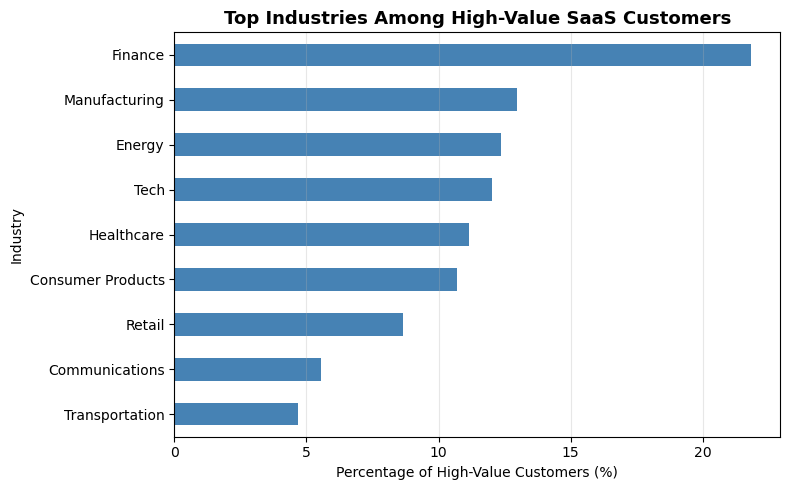

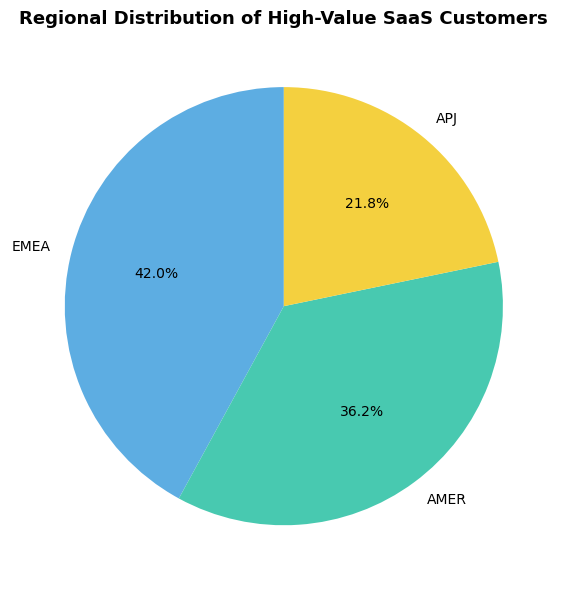

In [19]:
# Recreate from previous context
top_by_industry = top_df["Industry"].value_counts(normalize=True) * 100
top_by_region = top_df["Region"].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt

# Industry composition bar chart
plt.figure(figsize=(8,5))
top_by_industry.sort_values(ascending=True).plot(kind="barh", color="steelblue")
plt.title("Top Industries Among High-Value SaaS Customers", fontsize=13, weight="bold")
plt.xlabel("Percentage of High-Value Customers (%)")
plt.ylabel("Industry")
plt.grid(alpha=0.3, axis="x")
plt.tight_layout()
plt.show()

# Regional composition pie chart
plt.figure(figsize=(6,6))
plt.pie(top_by_region, labels=top_by_region.index, autopct="%1.1f%%", startangle=90,
        colors=["#5DADE2", "#48C9B0", "#F4D03F"])
plt.title("Regional Distribution of High-Value SaaS Customers", fontsize=13, weight="bold")
plt.tight_layout()
plt.show()
